In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

### 1. Load Data:

In [2]:
# Load data recorded for each shopper over 10 visits.
csv = pd.read_csv('HW_CLUSTERING_SHOPPING_CART_v2215H.csv')

# We collect data over 10 visits as a means to reduce noise. 

### 2. Compute Covariance Matrix:

In [3]:
# Drop the ID column and store the remaining data in a numpy array for further calculations.
data = csv.drop(columns='ID').to_numpy()

In [4]:
# Compute the covariance matrix for our agglomeration data.
covariance = csv.drop(columns='ID').cov()

In [5]:
covariance.shape

(20, 20)

In [6]:
# The np.{linear algebra}.eig function returns two lists: w and v
# w are the eigenvalues.
# v are the normalized eigenvectors. v[:,i] is the i-th eigenvector corresponding to eigenvalue w[i].
eigenvalues, eigenvectors = np.linalg.eig(covariance)

In [7]:
# Zip up the eigenvectors and their corresponding eigenvalues in tuples and store
# them in a list as principal components.
principal_componenets = []
for index, eigenvalue in enumerate(eigenvalues):
    principal_componenets.append( ( eigenvalue, eigenvectors[:,index] ) )

### 3. Sort _Eigenvalues_ in terms of highest to lowest absolute value:

In [8]:
sorted_principal_componenets = sorted( principal_componenets, key= lambda pc: np.abs(pc[0]), reverse=True )

### 4. Normalize Eigenvalues:

In [9]:
normalized_eigenvalues = eigenvalues / sum(np.abs(eigenvalues)) 

In [10]:
print('Normalized Eigenvalues:\n',normalized_eigenvalues)

Normalized Eigenvalues:
 [0.43699933 0.19657934 0.07872889 0.02286812 0.0212861  0.02106762
 0.02025577 0.01998045 0.01157316 0.01893775 0.01825724 0.01252512
 0.0130076  0.01701419 0.01682193 0.016234   0.01520716 0.01395318
 0.0143099  0.01439315]


#### _Plot Cumulative Sum of Normalized Eigenvalues_:

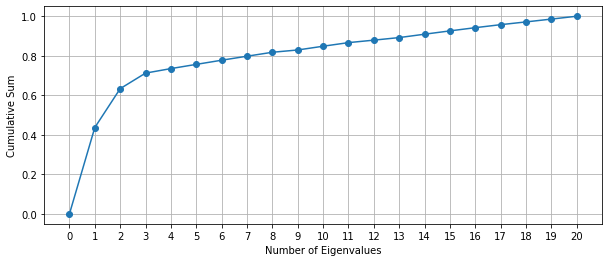

In [11]:
plt.figure( figsize=(10,4) )
plt.xlabel('Number of Eigenvalues')
plt.xticks(range(0,21))
plt.ylabel('Cumulative Sum')

# Use numpy to calculate the cumulative sum array for our normalized eigenvalues, and plot it.
# The numpy method does not add the 0 eigenvalue case, so make sure to add that to the graph.
plt.plot( np.append( [0], np.cumsum(normalized_eigenvalues) ), marker='o')
plt.grid()
plt.show()

### 5. Print first three Eigenvectors:

In [12]:
for principal_componenet in principal_componenets[:3]:
    print( principal_componenet[0], ':', principal_componenet[1],'\n')

52.342663753539 : [-3.44260251e-01 -3.06319142e-01 -3.64372518e-01  5.27081439e-02
 -1.34719411e-01 -5.38341343e-02  8.76986931e-02  5.27166467e-03
 -3.16825730e-01  3.96462166e-01  3.88788393e-01 -2.79437384e-04
  2.09775061e-01  4.10833031e-03  2.14156566e-01 -7.92599828e-03
  2.48953488e-01  3.04103235e-03  1.18736601e-01  2.20432834e-01] 

23.545771172110562 : [-0.27990665 -0.088456    0.1299679  -0.15584314 -0.57885758  0.06178216
 -0.2882337  -0.01699317  0.29151282 -0.09046266 -0.12363176  0.00892922
 -0.11636451 -0.03696817  0.04000521  0.00490163  0.43187276  0.00610799
 -0.36890916  0.05180344] 

9.429945538902203 : [-0.09429386 -0.30875522  0.14260536 -0.09302133  0.30125904 -0.05414311
 -0.11167912 -0.01529563  0.16026627  0.47046505 -0.29733167 -0.01352597
 -0.13631914  0.47300163 -0.12377651  0.03372626  0.22865617  0.00364486
  0.16062519 -0.2965035 ] 



In [34]:
pd.DataFrame( [ pc[1] for pc in principal_componenets[:3] ], columns= csv.drop(columns='ID').columns ).round(1)

,Milk,ChildBby,Vegges,Cereal,Bread,Rice,Meat,Eggs,YogChs,Chips,Soda,Fruit,Corn,Fish,Sauce,Beans,Tortya,Salt,Scented,Salza
0,-0.3,-0.3,-0.4,0.1,-0.1,-0.1,0.1,0.0,-0.3,0.4,0.4,-0.0,0.2,0.0,0.2,-0.0,0.2,0.0,0.1,0.2
1,-0.3,-0.1,0.1,-0.2,-0.6,0.1,-0.3,-0.0,0.3,-0.1,-0.1,0.0,-0.1,-0.0,0.0,0.0,0.4,0.0,-0.4,0.1
2,-0.1,-0.3,0.1,-0.1,0.3,-0.1,-0.1,-0.0,0.2,0.5,-0.3,-0.0,-0.1,0.5,-0.1,0.0,0.2,0.0,0.2,-0.3


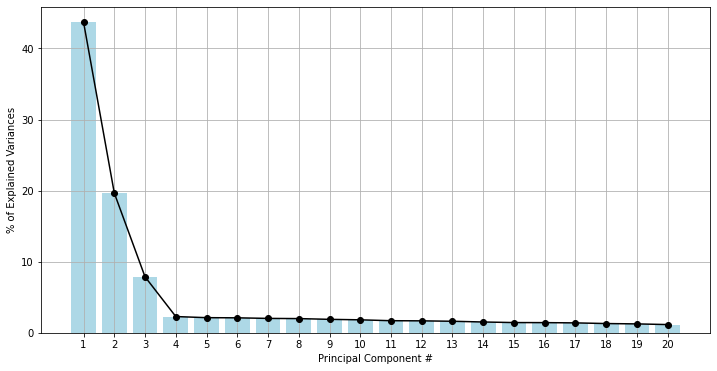

In [14]:
# Graph the % Explained Variances to understand the relationship between 
# attributes, PC's, and how much each PC contributes to understanding our data.
plt.figure( figsize=(12,6) )
plt.ylabel('% of Explained Variances')
plt.xticks(range(1,21))
plt.xlabel('Principal Component #')

plt.bar( range(1,21), sorted(normalized_eigenvalues*100, reverse=True), color='lightblue' )
plt.plot( range(1,21), sorted(normalized_eigenvalues*100, reverse=True), marker='o', color='k' )

plt.grid()
plt.show()

### 6. Project Original Agglomeration Data Onto First Two Eigenvectors / Principal Componenets

In [15]:
# Package the eigenvectors into a matrix, to be used for projection 
feature_vector_transpose = np.array( [ sorted_principal_componenets[0][1], sorted_principal_componenets[1][1] ] )

In [16]:
# Multiply the feature vector matrix with our agglomeration data to get the projected data.
projected_data = np.transpose(np.matmul( feature_vector_transpose, np.transpose(data) ))

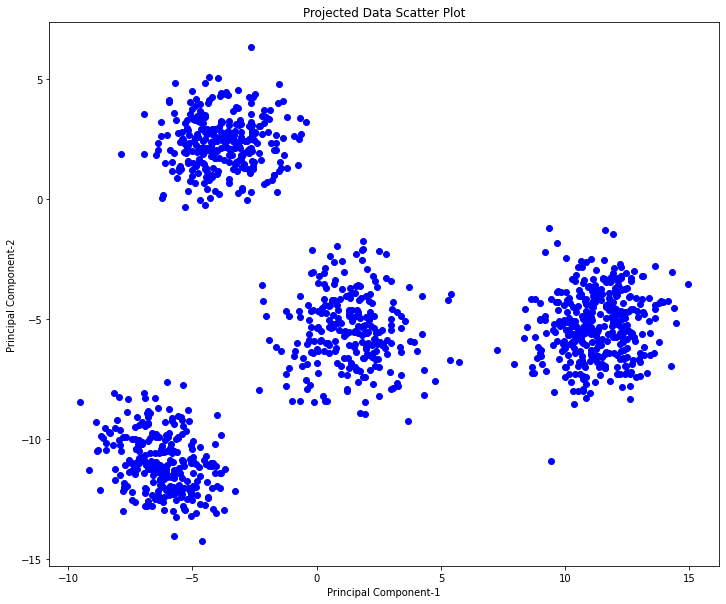

In [17]:
# Plot the data we projected
plt.figure( figsize=(12,10) )
plt.title('Projected Data Scatter Plot')
plt.xlabel('Principal Component-1')
plt.ylabel('Principal Component-2')

plt.scatter( projected_data[:,0], projected_data[:,1], color='b' )
plt.show()

### 7. K-Means:

In [18]:
# Calculate the cluster centers using SciKit-Lern's implementation of K-Means clustering.
cluster_centers = KMeans(4).fit(projected_data).cluster_centers_ # << We know there are 4 means, through observing the scatter plot of our data.

In [19]:
print('Cluster Centers (2D):\n',cluster_centers)

Cluster Centers (2D):
 [[ 11.29710934  -5.26712279]
 [ -3.82091281   2.34661997]
 [ -6.18918189 -11.01126516]
 [  1.346783    -5.51188042]]


In [20]:
pd.DataFrame(cluster_centers, columns=['PC-1','PC-2'])

,PC-1,PC-2
0,11.297109,-5.267123
1,-3.820913,2.346620
2,-6.189182,-11.011265
3,1.346783,-5.511880


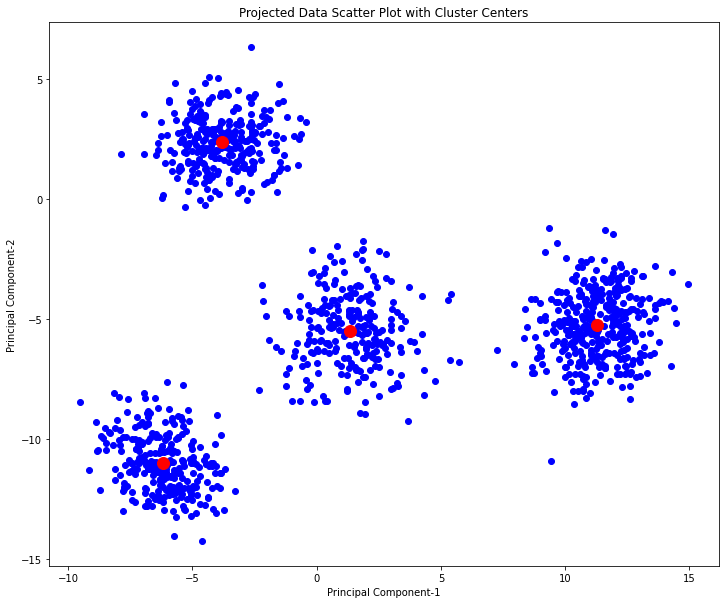

In [21]:
# Plot the cluster centers onto our projected data scatter plot.

plt.figure( figsize=(12,10) )
plt.title('Projected Data Scatter Plot with Cluster Centers')
plt.xlabel('Principal Component-1')
plt.ylabel('Principal Component-2')
    
plt.scatter( projected_data[:,0], projected_data[:,1], color='b' )
for center in cluster_centers:
    plt.plot( center[0],center[1], color='r', marker='o', markersize=12 )
    
plt.show()

---

#### _Projectection onto the first three PC's to obtain 3-dimensional data._

In [22]:
# Repeat projection, but now in 3D for the top-three principal components. 

feature_vector_transpose_3D = np.array( [ sorted_principal_componenets[0][1], sorted_principal_componenets[1][1], sorted_principal_componenets[2][1] ] )
projected_data_3D = np.transpose(np.matmul( feature_vector_transpose_3D, np.transpose(data) ))

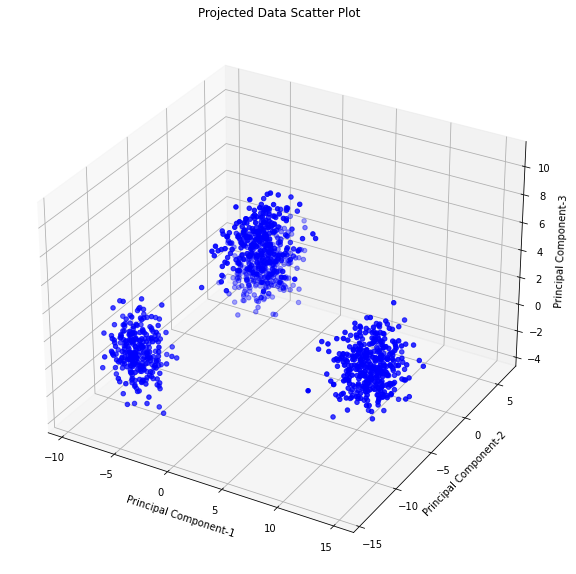

In [23]:
# 3-D scatter plot for projected data.

fig = plt.figure( figsize=(12,10) )
ax = plt.axes(projection='3d')
ax.set_title('Projected Data Scatter Plot')

plt.xlabel('Principal Component-1')
plt.ylabel('Principal Component-2')
ax.set_zlabel('Principal Component-3')

ax.scatter3D( projected_data_3D[:,0], projected_data_3D[:,1], projected_data_3D[:,2], color='b' )
plt.show()

### 8. Finding Center of Mass for the three clusters:

In [24]:
cluster_centers_3D = KMeans(3).fit(projected_data_3D).cluster_centers_

In [25]:
print('Cluster Centers (3D)\n', cluster_centers_3D)

Cluster Centers (3D)
 [[ -6.17517279 -11.00024479   0.17996988]
 [ 11.2493676   -5.28118219   0.52972513]
 [ -1.50750985  -1.18113306   3.74164594]]


In [26]:
pd.DataFrame(cluster_centers_3D, columns=['PC-1','PC-2','PC-3'])

,PC-1,PC-2,PC-3
0,-6.175173,-11.000245,0.179970
1,11.249368,-5.281182,0.529725
2,-1.507510,-1.181133,3.741646


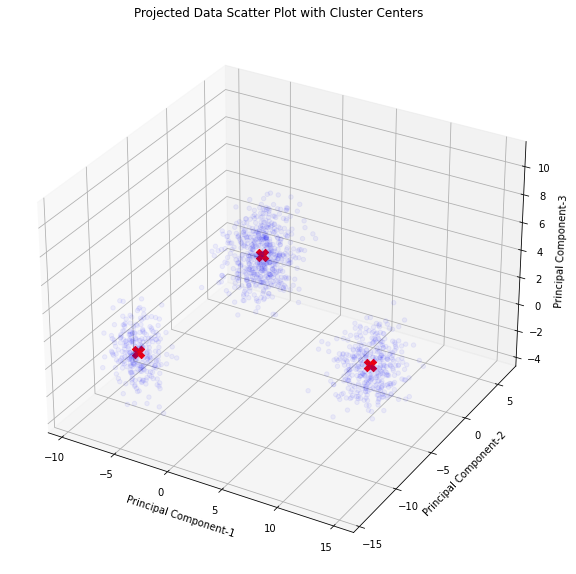

In [27]:
# Plot cluster centers in 3D.

fig = plt.figure( figsize=(12,10) )
ax = plt.axes(projection='3d')
ax.set_title('Projected Data Scatter Plot with Cluster Centers')

plt.xlabel('Principal Component-1')
plt.ylabel('Principal Component-2')
ax.set_zlabel('Principal Component-3')

ax.scatter3D( projected_data_3D[:,0], projected_data_3D[:,1], projected_data_3D[:,2], color='b', alpha=0.05 )
for center in cluster_centers_3D:
    ax.scatter3D( center[0], center[1], center[2], marker='X', color='r', s=150 )
    
plt.show()

### 9. Re-Projection:

In [28]:
# Multiplying the 2-D cluster centers by the first two principal componenets:
print('Re-Projection (2D)\n\n', np.matmul( cluster_centers, feature_vector_transpose ) )

Re-Projection (2D)

 [[-2.41484301e+00 -2.99461222e+00 -4.80091304e+00  1.41629461e+00
   1.52697404e+00 -9.33584329e-01  2.50890404e+00  1.49059704e-01
  -5.11464874e+00  4.95535436e+00  5.04336863e+00 -5.01881242e-02
   2.98275796e+00  2.41128152e-01  2.20863780e+00 -1.15358334e-01
   5.37727928e-01  2.18336674e-03  3.28447018e+00  2.21739877e+00]
 [ 6.58553873e-01  9.62846116e-01  1.69722088e+00 -5.67097844e-01
  -8.43607633e-01  3.50674786e-01 -1.01146403e+00 -6.00190914e-02
   1.89463330e+00 -1.72712885e+00 -1.77564330e+00  2.20211880e-02
  -1.07459550e+00 -1.02447820e-01 -7.24396547e-01  4.17868013e-02
   6.22116640e-02  2.71360063e-03 -1.31937179e+00 -7.20691665e-01]
 [ 5.21281566e+00  2.86987739e+00  8.24056830e-01  1.38980984e+00
   7.20775725e+00 -3.47110507e-01  2.63103459e+00  1.54489049e-01
  -1.24903291e+00 -1.45766815e+00 -1.04494001e+00 -9.65925023e-02
  -1.70155420e-02  3.81639129e-01 -1.76596189e+00 -4.91765615e-03
  -6.29628387e+00 -8.60781475e-02  3.32727411e+00 -1.

In [29]:
pd.DataFrame(np.matmul( cluster_centers, feature_vector_transpose ), columns=csv.drop(columns='ID').columns ).round(1)

,Milk,ChildBby,Vegges,Cereal,Bread,Rice,Meat,Eggs,YogChs,Chips,Soda,Fruit,Corn,Fish,Sauce,Beans,Tortya,Salt,Scented,Salza
0,-2.4,-3.0,-4.8,1.4,1.5,-0.9,2.5,0.1,-5.1,5.0,5.0,-0.1,3.0,0.2,2.2,-0.1,0.5,0.0,3.3,2.2
1,0.7,1.0,1.7,-0.6,-0.8,0.4,-1.0,-0.1,1.9,-1.7,-1.8,0.0,-1.1,-0.1,-0.7,0.0,0.1,0.0,-1.3,-0.7
2,5.2,2.9,0.8,1.4,7.2,-0.3,2.6,0.2,-1.2,-1.5,-1.0,-0.1,-0.0,0.4,-1.8,-0.0,-6.3,-0.1,3.3,-1.9
3,1.1,0.1,-1.2,0.9,3.0,-0.4,1.7,0.1,-2.0,1.0,1.2,-0.0,0.9,0.2,0.1,-0.0,-2.0,-0.0,2.2,0.0


In [30]:
# Multiplying the 3-D cluster centers by the first three principal componenets:
print('Re-Projection (3D)\n\n',np.matmul( cluster_centers_3D, feature_vector_transpose_3D ) )

Re-Projection (3D)

 [[ 5.18793815e+00  2.80904467e+00  8.46049264e-01  1.37208974e+00
   7.25370827e+00 -3.56927941e-01  2.60898785e+00  1.51622876e-01
  -1.22141567e+00 -1.36844146e+00 -1.09436665e+00 -9.89322799e-02
  -3.98925031e-02  4.66415325e-01 -1.78479692e+00  1.09503636e-03
  -6.24688564e+00 -8.53122673e-02  3.35377968e+00 -1.98442301e+00]
 [-2.44442193e+00 -3.14229977e+00 -4.70980289e+00  1.36669356e+00
   1.70112866e+00 -9.60563780e-01  2.44961031e+00  1.40944459e-01
  -5.01872435e+00  5.18691558e+00  4.86904132e+00 -5.74653666e-02
   2.90216728e+00  4.92012611e-01  2.13228362e+00 -9.71831999e-02
   6.40895505e-01  3.88308408e-03  3.36907533e+00  2.04908125e+00]
 [ 4.96768469e-01 -5.88995295e-01  9.29364534e-01 -2.43439443e-01
   2.01400333e+00 -1.94401809e-01 -2.09628021e-01 -4.51067210e-02
   7.32962129e-01  1.26949145e+00 -1.55258662e+00 -6.07347136e-02
  -6.88853971e-01  1.80727559e+00 -8.33222475e-01  1.32350770e-01
  -2.98485881e-02  1.83906151e-03  8.57736784e-01 -1.

In [31]:
pd.DataFrame(np.matmul( cluster_centers_3D, feature_vector_transpose_3D ), columns=csv.drop(columns='ID').columns ).round(1)

,Milk,ChildBby,Vegges,Cereal,Bread,Rice,Meat,Eggs,YogChs,Chips,Soda,Fruit,Corn,Fish,Sauce,Beans,Tortya,Salt,Scented,Salza
0,5.2,2.8,0.8,1.4,7.3,-0.4,2.6,0.2,-1.2,-1.4,-1.1,-0.1,-0.0,0.5,-1.8,0.0,-6.2,-0.1,3.4,-2.0
1,-2.4,-3.1,-4.7,1.4,1.7,-1.0,2.4,0.1,-5.0,5.2,4.9,-0.1,2.9,0.5,2.1,-0.1,0.6,0.0,3.4,2.0
2,0.5,-0.6,0.9,-0.2,2.0,-0.2,-0.2,-0.0,0.7,1.3,-1.6,-0.1,-0.7,1.8,-0.8,0.1,-0.0,0.0,0.9,-1.5
